### Data Cleanup 
In the following block I perform
1. Retain releavnt data I need
2. Downsample good transactions such that representation of fraudulent transactions in the final dataset is atleast 5%

In [1]:
import pandas as pd
df=pd.read_csv('PS_20174392719_1491204439457_log.csv')
print(f'Shape of dataframe is {df.shape}')
print(f'Columns of data are {df.columns.values}')
df.head()

Shape of dataframe is (6362620, 11)
Columns of data are ['step' 'type' 'amount' 'nameOrig' 'oldbalanceOrg' 'newbalanceOrig'
 'nameDest' 'oldbalanceDest' 'newbalanceDest' 'isFraud' 'isFlaggedFraud']


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
## we dont need the name orig, name dest and is flagged fraud
df=df[['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']]
print(f'Shape of dataframe is {df.shape}')
print(f'Columns of data are {df.columns.values}')
df.head()

Shape of dataframe is (6362620, 8)
Columns of data are ['step' 'type' 'amount' 'oldbalanceOrg' 'newbalanceOrig' 'oldbalanceDest'
 'newbalanceDest' 'isFraud']


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [4]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [6]:
(8213/6354407)*100

0.129248881917699

In [8]:
# Separate the data into fraud and not fraud
fraud = df[df['isFraud'] == 1]
not_fraud = df[df['isFraud'] == 0]

# Calculate the number of not_fraud rows to keep
# for 5% representation of fraud
num_not_fraud_to_keep = int(len(fraud) / 0.05)

# Randomly select not_fraud rows
not_fraud_downsampled = not_fraud.sample(n=num_not_fraud_to_keep, random_state=1)

# Concatenate the fraud and downsampled not_fraud data
downsampled_df = pd.concat([fraud, not_fraud_downsampled], axis=0)

# Optionally, shuffle the data if you'll be using it for machine learning
downsampled_df = downsampled_df.sample(frac=1, random_state=1).reset_index(drop=True)

In [9]:
print(f'Shape of dataframe is {downsampled_df.shape}')
print(f'Columns of data are {downsampled_df.columns.values}')
downsampled_df.head()

Shape of dataframe is (172473, 8)
Columns of data are ['step' 'type' 'amount' 'oldbalanceOrg' 'newbalanceOrig' 'oldbalanceDest'
 'newbalanceDest' 'isFraud']


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,255,CASH_IN,264302.70,5924128.05,6188430.75,557768.00,293465.31,0
1,43,PAYMENT,33876.61,0.00,0.00,0.00,0.00,0
2,13,CASH_IN,233592.99,1102329.16,1335922.15,1085498.49,858060.98,0
3,582,PAYMENT,5454.26,22083.00,16628.74,0.00,0.00,0
4,308,CASH_OUT,17602.72,0.00,0.00,345634.34,363237.06,0


In [10]:
downsampled_df['isFraud'].value_counts()

isFraud
0    164260
1      8213
Name: count, dtype: int64

In [11]:
(8213/164260)*100

5.0

In [12]:
df=None
fraud=None
not_fraud=None
not_fraud_downsampled=None

### Exploratory Data Analysis
In this block I basically get a batter idea of the data, identify null / patterns
1. Basic statics (Mean, min, max)
2. Some visual exploration

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=downsampled_df
# Basic info about data types and null values
print(df.info())

print('#################################')
# Descriptive statistics
print(df.describe().round(1))
print('#################################')

# Check for any null values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172473 entries, 0 to 172472
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            172473 non-null  int64  
 1   type            172473 non-null  object 
 2   amount          172473 non-null  float64
 3   oldbalanceOrg   172473 non-null  float64
 4   newbalanceOrig  172473 non-null  float64
 5   oldbalanceDest  172473 non-null  float64
 6   newbalanceDest  172473 non-null  float64
 7   isFraud         172473 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 10.5+ MB
None
#################################
           step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count  172473.0    172473.0       172473.0        172473.0        172473.0   
mean      249.1    243130.4       870219.3        822967.6       1075033.1   
std       149.2    856214.4      2939859.7       2902872.3       3407079.0   
min         1.0 

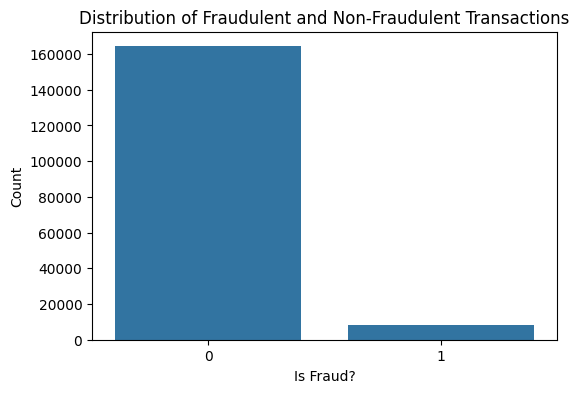

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=df)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Is Fraud?')
plt.ylabel('Count')
plt.show()

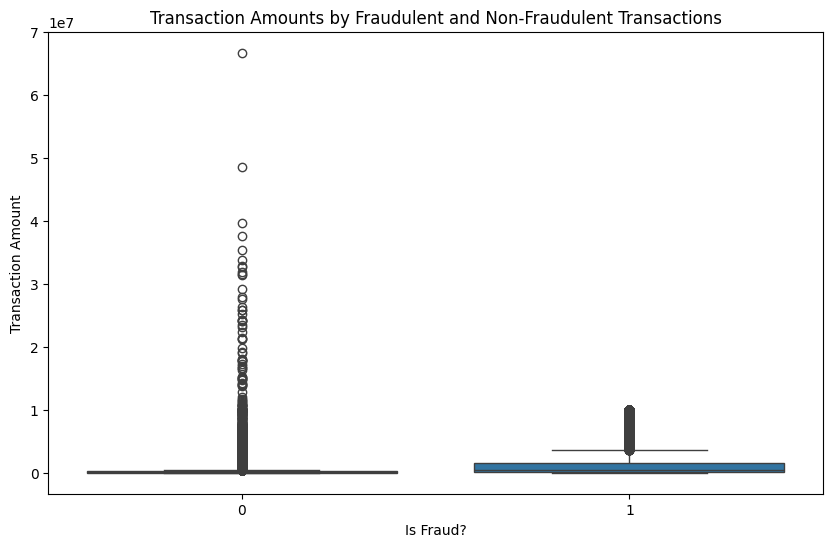

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Transaction Amounts by Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Is Fraud?')
plt.ylabel('Transaction Amount')
plt.show()

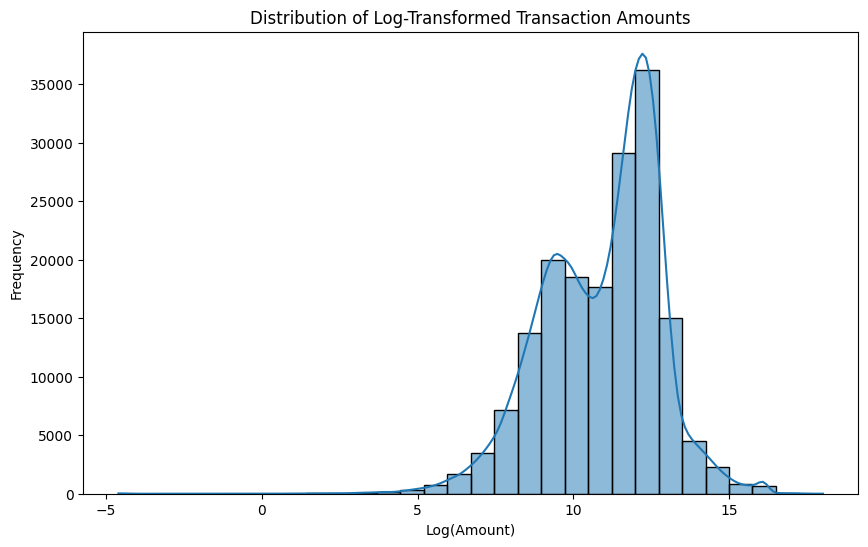

In [33]:
import numpy as np
# Add a small constant to avoid log(0)
df['log_amount'] = np.log(df['amount'] + 0.01)

plt.figure(figsize=(10, 6))
sns.histplot(df['log_amount'], bins=30, kde=True)
plt.title('Distribution of Log-Transformed Transaction Amounts')
plt.xlabel('Log(Amount)')
plt.ylabel('Frequency')
plt.show()

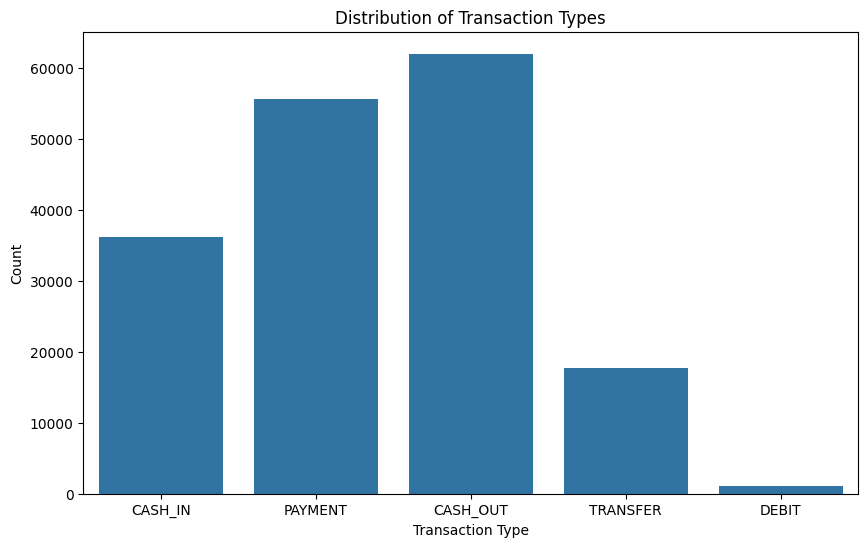

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

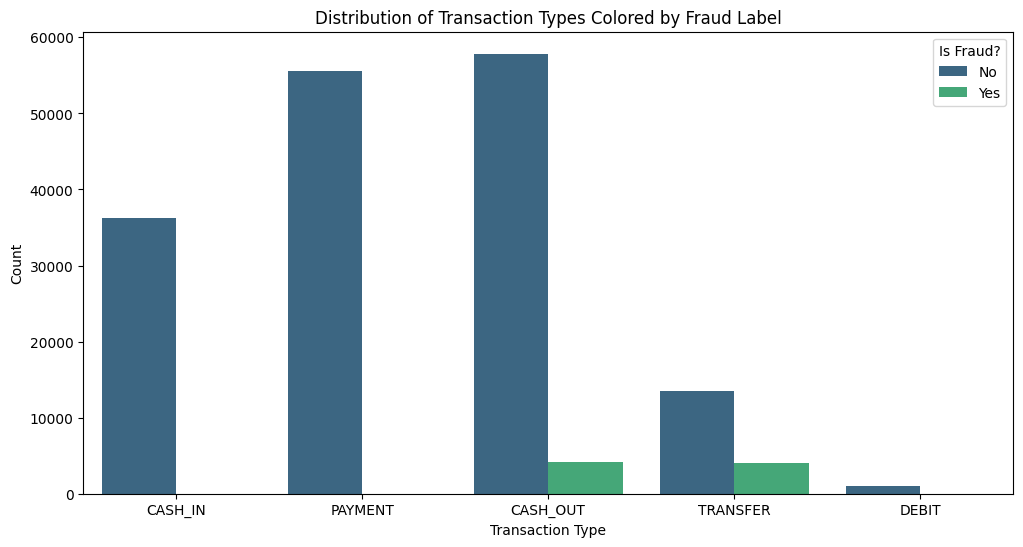

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(x='type', hue='isFraud', data=df, palette='viridis')
plt.title('Distribution of Transaction Types Colored by Fraud Label')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Is Fraud?', loc='upper right', labels=['No', 'Yes'])
plt.show()

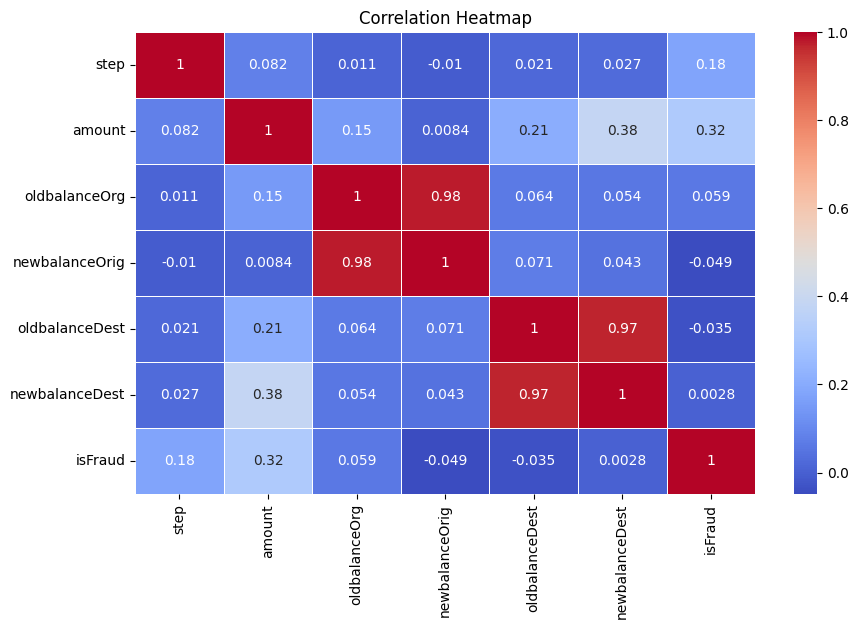

In [36]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Store data for training
Here I split data into training and testing set and store it 

In [37]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df.drop(columns=['isFraud'])
y = df['isFraud']

# Splitting the data while stratifying on 'isFraud'
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Concatenating X and y for train and test DataFrames
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Checking the distribution in training set
print(train_df['isFraud'].value_counts(normalize=True))

# Checking the distribution in testing set
print(test_df['isFraud'].value_counts(normalize=True))

isFraud
0    0.952382
1    0.047618
Name: proportion, dtype: float64
isFraud
0    0.952379
1    0.047621
Name: proportion, dtype: float64


In [40]:
train_df.to_csv('training.csv',index=False)
test_df.to_csv('testing.csv',index=False)